In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib notebook

### Load datasets

In [14]:
colNames2D = ['devices', 'batch_size', 'chan_in', 'chan_out', 'kernel_size', 'groups', 'xdim', 'ydim', 'throughput']
colNames3D = ['devices', 'batch_size', 'chan_in', 'chan_out', 'kernel_size', 'groups', 'xdim', 'ydim', 'zdim', 'throughput']

def read_and_assign_colnames(file, colnames):
    pd_array = pd.read_csv(file, delim_whitespace=True, header = None)
    pd_array.columns = colnames
    # Take the means for each batch_size, chan_in, chan_out, devices, kernel_size, xcdim, ydim and zdim
    pd_array = pd_array.groupby(colnames[0:-1]).mean().reset_index()
    pd_array['C_per_group'] = pd_array['chan_in'] / pd_array['groups']
    pd_array['C_per_group'] = pd_array['C_per_group'].apply(int) # Round to int
    # Sort by groups, before converting to string
    pd_array = pd_array.sort_values(by=['C_per_group'])
    # Convert to string, so that it will be treated as categorical by plotting functions
    pd_array['groups'] = pd_array['groups'].apply(str)
    pd_array['C_per_group'] = pd_array['C_per_group'].apply(str)
    # Duplicate columns that we want to give different names - hacky, but easier for visualizing
    pd_array['Batch Size'] = pd_array['batch_size']
    pd_array['Channels'] = pd_array['chan_in']
    pd_array['Throughput [img/s]'] = pd_array['throughput']
    pd_array['Channels per group'] = pd_array['C_per_group']
    pd_array['Input Size'] = pd_array['xdim']
    if 'zdim' in pd_array.columns:
        ndim = [3]*len(pd_array)
    else:
        ndim = [2]*len(pd_array)
    pd_array['ndim'] = ndim
        
    return pd_array

rtx2D = read_and_assign_colnames('runs/titanrtx_2D.txt', colNames2D)
rtx3D = read_and_assign_colnames('runs/titanrtx_3D.txt', colNames3D)
sky2D = read_and_assign_colnames('runs/skylake_2D.txt', colNames2D)
sky3D = read_and_assign_colnames('runs/skylake_3D.txt', colNames3D)

### Create plotting function

In [15]:
def createPlot(pdarray):
    fg = seaborn.FacetGrid(data = pdarray.query('batch_size != 64 & batch_size != 128 & (xdim == 512 | (xdim == 128 & ndim == 3))'), col='Batch Size', hue='Channels')
    fg.map(plt.scatter, 'Channels per group', 'Throughput [img/s]', s=10).add_legend()
    return fg

def createPlotFull(pdarray):
    fg = seaborn.FacetGrid(data = pdarray.query('(xdim == 512 | (xdim == 128 & ndim == 3))'), col='Batch Size', hue='Channels')
    fg.map(plt.scatter, 'Channels per group', 'Throughput [img/s]', s=10).add_legend()
    return fg

### RTX 2D

<IPython.core.display.Javascript object>


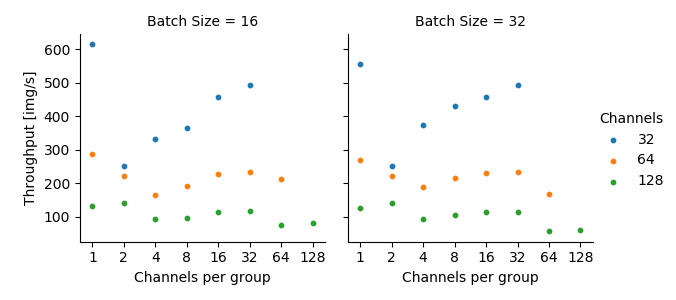

In [16]:
createPlot(rtx2D)

<IPython.core.display.Javascript object>


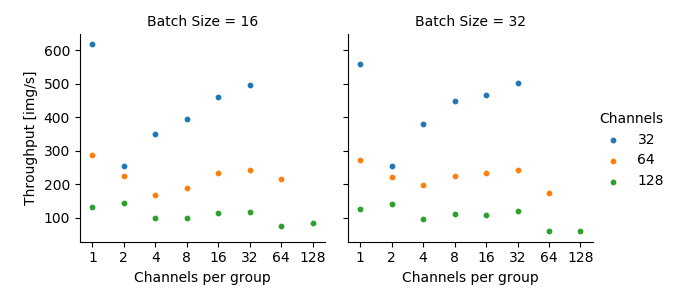

In [5]:
createPlot(rtx2D_bench)

### RTX 3D

<IPython.core.display.Javascript object>


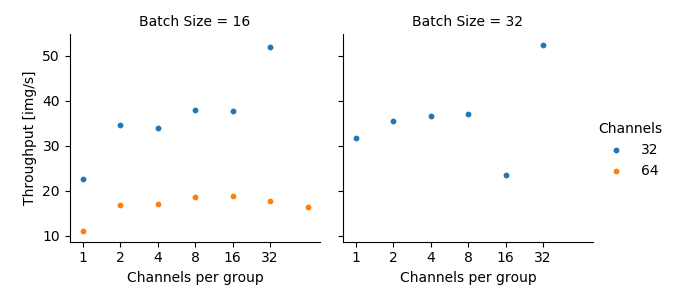

In [17]:
createPlot(rtx3D)

### SKYLAKE 2D

<IPython.core.display.Javascript object>


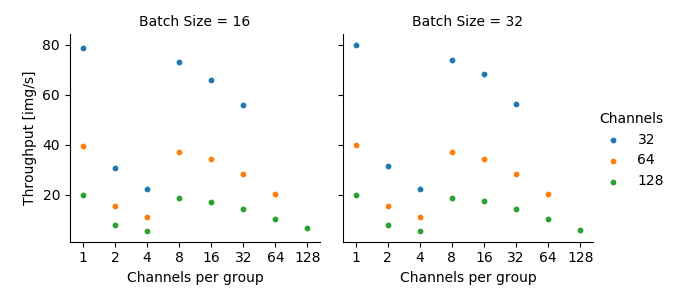

In [18]:
createPlot(sky2D)

### SKYLAKE 3D

<IPython.core.display.Javascript object>


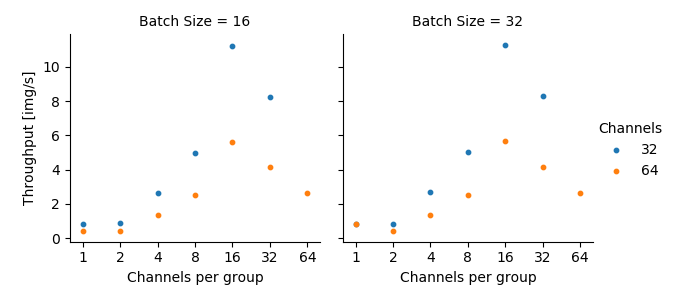

In [19]:
createPlot(sky3D)